In [1]:
import pandas as pd

ur1 = 'https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv'
data = pd.read_csv(ur1)
data
# y = ax+b
x = data['YearsExperience']
y = data['Salary']

In [2]:
!pip install wget
import wget
wget.download('https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf')

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=1067b0f876e9619867f077cc50f13377cff27e03a12f46971f636c73da31f48f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'ChineseFont.ttf'

In [3]:
def compute_gradient(x,y,a,b):
  a_gradient = (x*(a*x +b -y)).mean()# cost function 對 a作微分的結果 且加總後算平均 乘以2可以省略 因為這會間接影響到步伐大小
  b_gradient =(a*x+b-y).mean()# cost function 對 b作微分的結果 乘以2可以省略 因為這會間接影響到步伐大小

  return a_gradient, b_gradient

In [4]:
compute_gradient(x,y,20,10)

(268.54757575757577, 35.084848484848486)

In [5]:
def compute_cost(x,y,a,b):
  y_pred = a*x +b
  cost = (y - y_pred)**2
  cost = cost.sum() / len(x)

  return cost

In [6]:
def gradient_descent(x, y, a_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter = 1000):

  c_hist = [] #這三個列表就是拿來儲存 我們跑的每一次裡面的cost a and b 值
  a_hist = []
  b_hist = []

  a = a_init
  b = b_init

  for i in range(run_iter):
    a_gradient, b_gradient = gradient_function(x,y,a,b) #得到a,b斜率

    a = a - a_gradient*learning_rate # 得到更新後的a斜率
    b = b - b_gradient*learning_rate # 得到更新後的b斜率
    cost = cost_function(x,y,a,b)


    a_hist.append(a)
    b_hist.append(b)
    c_hist.append(cost)

    if i%p_iter == 0:
      print(f'Ieration {i: 6}: Cost: {cost: .4e}, a: {a: .2e}, b: {b: .2e}, a_gradient: {a_gradient: .2e}, b_gradient: {b_gradient: .2e}') # cost那邊的.2f是指只取到小數點後兩位/ i:6 是指佔用6格 這樣比較整齊

  return a, b, a_hist, b_hist, c_hist


In [7]:
a_init = 0
b_init = 0
learning_rate = 1.0e-3 #這是科學記號的寫法 也就是0.001
run_iter = 20000


a_final, b_final, a_hist, b_hist, c_hist = gradient_descent(x, y, a_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)


Ieration      0: Cost:  5.6568e+03, a:  4.36e-01, b:  7.26e-02, a_gradient: -4.36e+02, b_gradient: -7.26e+01
Ieration   1000: Cost:  1.4097e+02, a:  1.21e+01, b:  8.07e+00, a_gradient:  8.00e-01, b_gradient: -5.32e+00
Ieration   2000: Cost:  9.6063e+01, a:  1.14e+01, b:  1.27e+01, a_gradient:  6.12e-01, b_gradient: -4.08e+00
Ieration   3000: Cost:  6.9732e+01, a:  1.09e+01, b:  1.63e+01, a_gradient:  4.69e-01, b_gradient: -3.12e+00
Ieration   4000: Cost:  5.4293e+01, a:  1.05e+01, b:  1.91e+01, a_gradient:  3.59e-01, b_gradient: -2.39e+00
Ieration   5000: Cost:  4.5241e+01, a:  1.02e+01, b:  2.12e+01, a_gradient:  2.75e-01, b_gradient: -1.83e+00
Ieration   6000: Cost:  3.9933e+01, a:  9.91e+00, b:  2.28e+01, a_gradient:  2.10e-01, b_gradient: -1.40e+00
Ieration   7000: Cost:  3.6821e+01, a:  9.73e+00, b:  2.40e+01, a_gradient:  1.61e-01, b_gradient: -1.07e+00
Ieration   8000: Cost:  3.4996e+01, a:  9.59e+00, b:  2.49e+01, a_gradient:  1.23e-01, b_gradient: -8.22e-01
Ieration   9000: Co

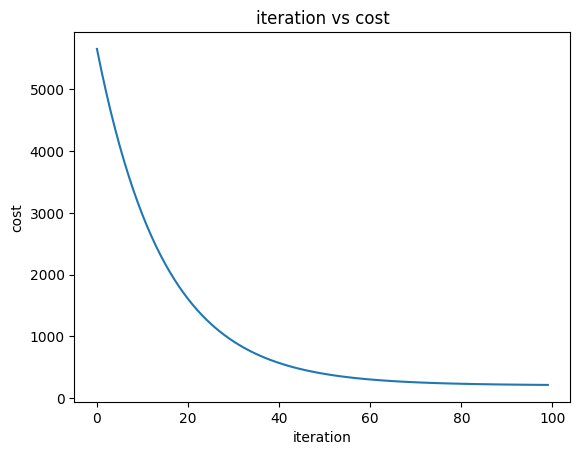

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0,100), c_hist[:100]) #前面是x軸 後面是y軸 且看前一百次的更新資料

plt.title('iteration vs cost')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

In [9]:
print(f'最終的a b = ({a_final: .2f}, {b_final: .2f})') #找到最適合的那條直線了

最終的a b = ( 9.14,  27.89)


In [10]:
print(f'年資3.5  預測薪水：{a_final*3.5 + b_final: .1f}K')
print(f'年資5.9  預測薪水：{a_final*5.9 + b_final: .1f}K')


年資3.5  預測薪水： 59.9K
年資5.9  預測薪水： 81.8K


In [11]:
ass = np.arange(-100,101)
bs = np.arange(-100,101)
costs = np.zeros((201,201))

i = 0
for a in ass:
  j = 0
  for b in bs:
    cost = compute_cost(x,y,a,b)
    costs[i,j] = cost
    j = j+1
  i = i+1

costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

In [12]:
a_init = -100
b_init = -100
learning_rate = 1.0e-3 #這是科學記號的寫法 也就是0.001
run_iter = 10000


a_final, b_final, a_hist, b_hist, c_hist = gradient_descent(x, y, a_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)

Ieration      0: Cost:  5.0753e+05, a: -9.58e+01, b: -9.93e+01, a_gradient: -4.20e+03, b_gradient: -6.61e+02
Ieration   1000: Cost:  1.9382e+03, a:  2.17e+01, b: -5.56e+01, a_gradient:  3.35e+00, b_gradient: -2.23e+01
Ieration   2000: Cost:  1.1499e+03, a:  1.87e+01, b: -3.60e+01, a_gradient:  2.57e+00, b_gradient: -1.71e+01
Ieration   3000: Cost:  6.8762e+02, a:  1.65e+01, b: -2.10e+01, a_gradient:  1.96e+00, b_gradient: -1.31e+01
Ieration   4000: Cost:  4.1658e+02, a:  1.48e+01, b: -9.51e+00, a_gradient:  1.50e+00, b_gradient: -1.00e+01
Ieration   5000: Cost:  2.5766e+02, a:  1.34e+01, b: -7.18e-01, a_gradient:  1.15e+00, b_gradient: -7.67e+00
Ieration   6000: Cost:  1.6448e+02, a:  1.24e+01, b:  6.01e+00, a_gradient:  8.82e-01, b_gradient: -5.87e+00
Ieration   7000: Cost:  1.0985e+02, a:  1.17e+01, b:  1.12e+01, a_gradient:  6.75e-01, b_gradient: -4.50e+00
Ieration   8000: Cost:  7.7815e+01, a:  1.11e+01, b:  1.51e+01, a_gradient:  5.17e-01, b_gradient: -3.44e+00
Ieration   9000: Co

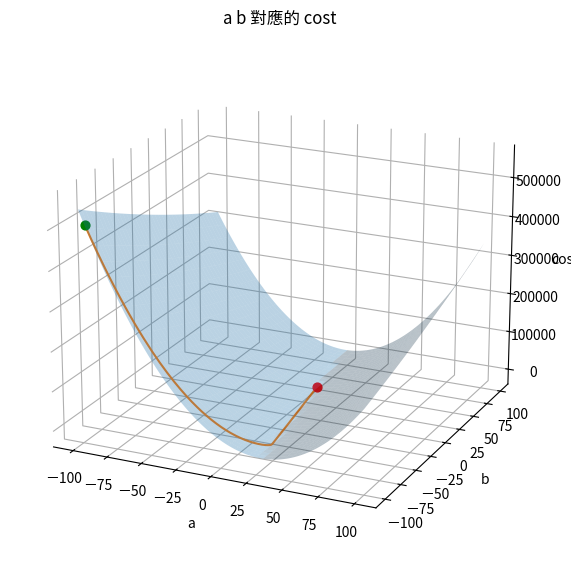

In [13]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont('ChineseFont.ttf')
mpl.rc('font', family = 'ChineseFont')

plt.figure(figsize = (7,7)) #把圖變大一點 寬度&高度
ax = plt.axes(projection = '3d')
ax.view_init(20,-65) # 讓圖選轉 第一個參數是上下旋轉角度 第二個參數是左右選轉角度
ax.xaxis.set_pane_color((1,1,1)) #改網格顏色
ax.yaxis.set_pane_color((1,1,1))
ax.zaxis.set_pane_color((1,1,1))


b_grid, a_grid = np.meshgrid(bs, ass) # 先把ba and ass的一維矩陣 轉化為二維網格
ax.plot_surface(a_grid, b_grid, costs, alpha = 0.3) # 這邊在把二維網格傳入, cmap是改顏色, alhpa是透明度


ax.set_title('a b 對應的 cost')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('cost')

a_index, b_index = np.where(costs == np.min(costs))# 找出cost最低的那個點 且對應到多少a和b值 但回傳的是索引值 並非實際的a,b(因為costs是二維矩陣 所以會回傳兩個值)
ax.scatter(ass[a_index], bs[b_index], costs[a_index, b_index], color = 'red', s = 40) #把最小cost的那個點畫出來

ax.scatter(a_hist[0], b_hist[0], c_hist[0], color = 'green', s = 40) #把初始點畫出來 就是a, b and cost的第零個值
ax.plot(a_hist, b_hist, c_hist) #把a b更新過程用線的方式畫上去 畫線就是用plot


plt.show()